<a href="https://colab.research.google.com/github/TheoHelfenberger/notes-handson-ml/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url,delimiter=";")
df.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Check for nan values
df1 = df[df.isna().any(axis=1)]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [64]:
df.groupby(['quality']).size().reset_index(name='counts')

,quality,counts
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


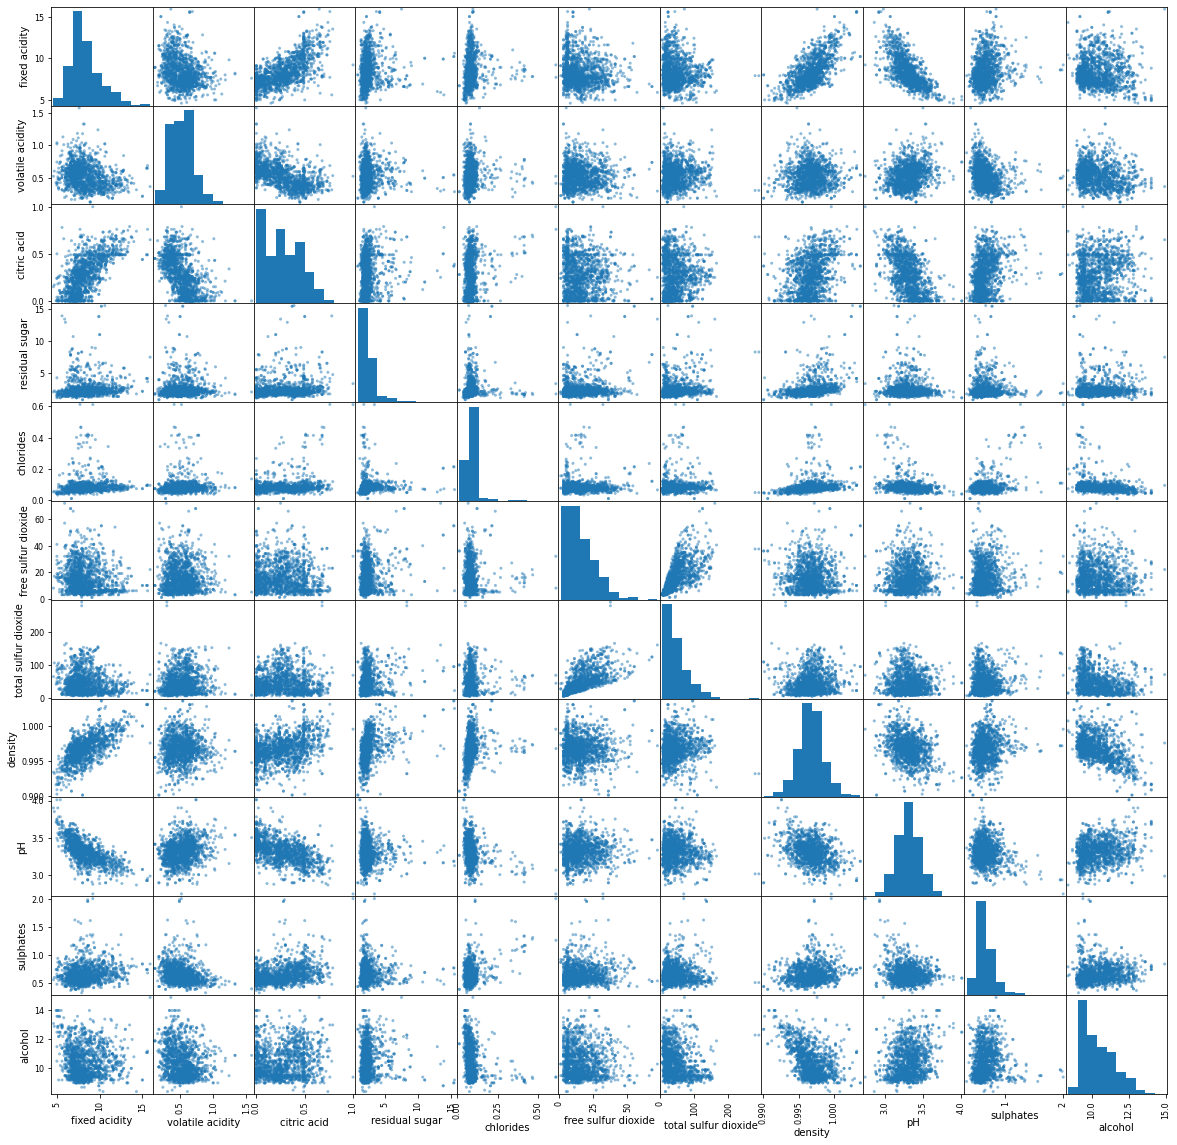

In [8]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df.iloc[:,:-1], figsize=(20,20))

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [65]:
df_copy = df.copy()
y = df_copy.pop('quality')
X = df_copy

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler

lreg_pipe = Pipeline([('std_scaler', StandardScaler()),
                 ('reg',LogisticRegression(max_iter=10000))])

# logisticRegr = LogisticRegression(max_iter=10000)
# model = pipe.fit(x_train, y_train)

In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

y_train_predict = cross_val_predict(lreg_pipe, x_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[  1,   1,   6,   1,   0,   0],
       [  0,   0,  23,  15,   2,   0],
       [  3,   0, 387, 124,   3,   0],
       [  0,   2, 158, 277,  32,   0],
       [  0,   0,   9,  99,  43,   0],
       [  0,   0,   0,   8,   5,   0]])

In [71]:
def show_classification_report(classification_report):
  print(f"Accuracy {report.pop('accuracy')}")
  # Build a DataFrame from the classification_report output_dict.
  report_data = []
  for label, metrics in report.items():
      #print(label, metrics)
      metrics['label'] = label
      report_data.append(metrics)

  report_df = pd.DataFrame(
      report_data, 
      columns=['label', 'precision', 'recall', 'f1-score', 'support']
  )

  # Plot as a bar chart.
  res = report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

Accuracy 0.5904920767306089


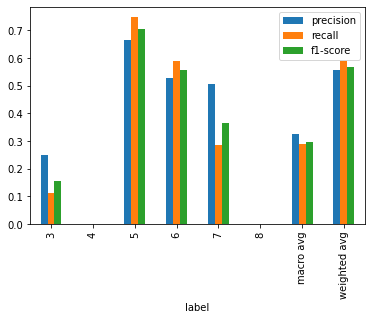

In [72]:
report = classification_report(y_train, y_train_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.603836530442035


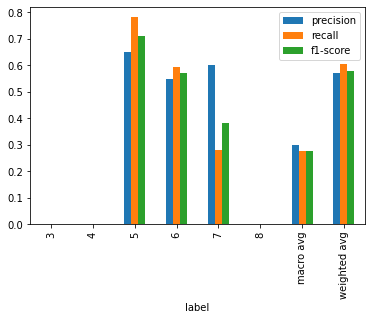

In [75]:
from sklearn.svm import SVC

svc_pipe = Pipeline([('std_scaler', StandardScaler()),
                 ('svc',SVC())])

y_train_svc_predict = cross_val_predict(svc_pipe, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_svc_predict)

report = classification_report(y_train, y_train_svc_predict, zero_division=False, output_dict=True)
show_classification_report(report)


Accuracy 0.5504587155963303


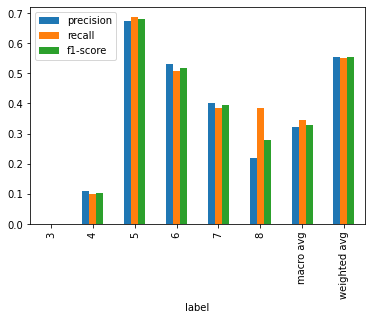

In [78]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
y_train_tree_predict = cross_val_predict(tree_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_tree_predict, zero_division=False, output_dict=True)
show_classification_report(report)


Accuracy 0.6488740617180984


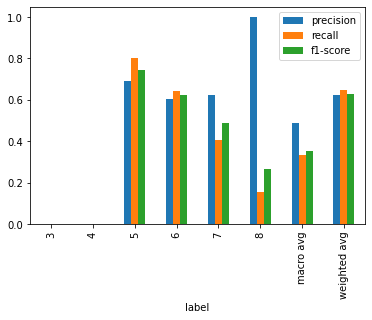

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_train_forest_predict = cross_val_predict(forest_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_forest_predict, zero_division=False, output_dict=True)
show_classification_report(report)

In [105]:
forest_clf.fit(x_train, y_train)

for name, score in zip(X.columns, forest_clf.feature_importances_):
  print(name, score)

fixed acidity 0.07299397641395056
volatile acidity 0.10387971181362168
citric acid 0.07625797908589323
residual sugar 0.07265608380677184
chlorides 0.08091050422324736
free sulfur dioxide 0.0659547547534359
total sulfur dioxide 0.1057669667509203
density 0.09564414425993403
pH 0.07115815989111196
sulphates 0.11016993353116307
alcohol 0.1446077854699501


Accuracy 0.66


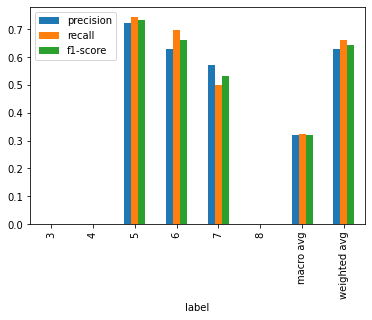

In [111]:
y_test_forest_predict = forest_clf.predict(x_test)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_test, y_test_forest_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.6522101751459549


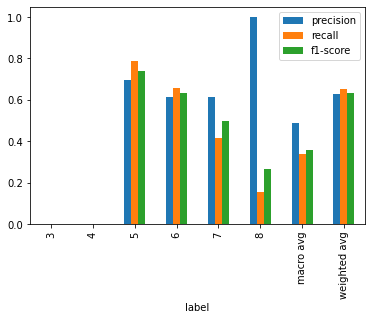

In [91]:
from sklearn.ensemble import VotingClassifier

# voting_clf = VotingClassifier(estimators=[('svc_pipe', SVC()), ('forest', forest_clf), ('lreg', LogisticRegression(max_iter=10000))], voting='hard')
voting_clf = VotingClassifier(estimators=[('forest', forest_clf)], voting='hard')
# y_train_voting_predict = cross_val_predict(voting_clf, x_train, y_train, cv=3)

voting_pipe = Pipeline([('std_scaler', StandardScaler()), ('voting',voting_clf)])

y_train_voting_predict = cross_val_predict(voting_pipe, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_voting_predict, zero_division=False, output_dict=True)
show_classification_report(report)


# voting_pipe.fit(x_train, y_train)



Accuracy 0.6113427856547122


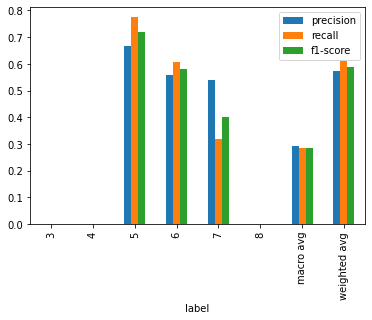

In [92]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=1)

y_train_bagging_predict = cross_val_predict(bag_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_bagging_predict, zero_division=False, output_dict=True)
show_classification_report(report)

Accuracy 0.5771476230191827


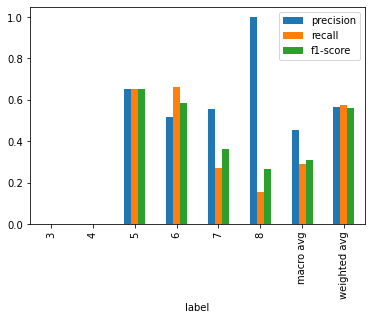

In [108]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

y_train_ada_predict = cross_val_predict(ada_clf, x_train, y_train, cv=3)
# cm = confusion_matrix(y_train, y_train_tree_predict)

report = classification_report(y_train, y_train_ada_predict, zero_division=False, output_dict=True)
show_classification_report(report)